# Models of the space between genres

In [62]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [75]:
df = pd.read_csv('results/new_comparisons.tsv', sep = '\t')
df = df.assign(alien = (df.alienacc1 + df.alienacc2)/2)
df.head()

,testype,name1,name2,ratio,spearman,spear1on2,spear2on1,loss,loss1on2,loss2on1,acc1,acc2,alienacc1,alienacc2,meandate1,meandate2,alien
0,fantasy2mixed,goldfantasy_0,mixeddata_0_0,0,1.058268,1.020412,1.096123,-0.023333,-0.040000,-0.006667,0.813333,0.813333,0.820000,0.853333,1892.566667,1888.706667,0.836667
1,detective2mixed,golddetective_0,mixeddata_0_0,100,0.080297,0.032722,0.127871,0.300000,0.266667,0.333333,0.906667,0.813333,0.573333,0.546667,1891.413333,1888.706667,0.560000
2,fantasy2mixed,goldfantasy_0,mixeddata_0_5,5,0.999742,1.103884,0.895601,0.020000,0.000000,0.040000,0.813333,0.833333,0.773333,0.833333,1892.566667,1889.853333,0.803333
3,detective2mixed,golddetective_0,mixeddata_0_5,95,0.244162,0.278577,0.209747,0.290000,0.213333,0.366667,0.906667,0.833333,0.540000,0.620000,1891.413333,1889.853333,0.580000
4,fantasy2mixed,goldfantasy_0,mixeddata_0_10,10,1.017118,1.005464,1.028773,0.016667,0.033333,0.000000,0.813333,0.880000,0.813333,0.846667,1892.566667,1892.026667,0.830000


In [73]:
def partitiontype(astring):
    iteration = int(astring[-1:])
    if iteration < 3:
        return "mixed2"
    else:
        return "mixed1"

In [69]:
df = df.assign(partype = df['name1'].apply(partitiontype))
df = df.loc[df.partype == 'mixed2']
df.shape

(234, 18)

In [76]:
det = df.loc[df.testype == 'detective2mixed', :]
fan = df.loc[df.testype == 'fantasy2mixed', :]

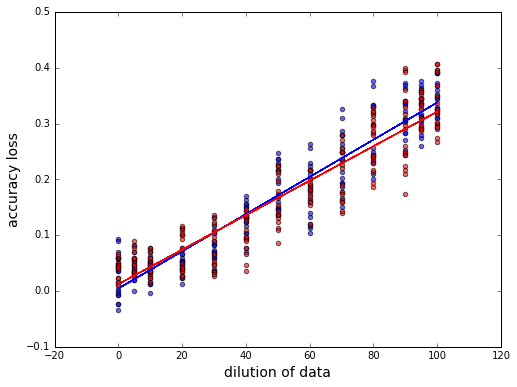

In [78]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(fan.ratio, fan.loss, c ='b', alpha = 0.6)
plt.scatter(det.ratio, det.loss, c = 'r', alpha = 0.6)
plt.xlabel('dilution of data', fontsize = 14)
plt.ylabel('accuracy loss', fontsize = 14)


z = np.polyfit(fan.ratio, fan.loss, 1)
p = np.poly1d(z)
ax.plot(fan.ratio, p(fan.ratio), linestyle = (0, (5, 5)), c = 'b')

z = np.polyfit(det.ratio, det.loss, 1)
p = np.poly1d(z)
ax.plot(det.ratio, p(det.ratio), linestyle = (0, (5, 5)), c = 'r')

plt.show()

In [58]:
pearsonr(df.ratio, df.loss)

(0.93507081772916645, 1.0139712982210098e-182)

In [28]:
pearsonr(det.ratio, det.loss)

(0.94492200998141673, 8.5355341916360761e-31)

In [29]:
pearsonr(df.ratio, df.spearman)

(-0.87804115107810654, 3.5200316645083674e-41)

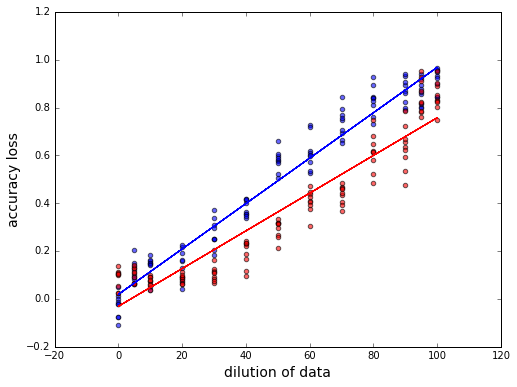

In [44]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(fan.ratio, fan.loss/(((fan.acc1 + fan.acc2)/2) - 0.5), c ='b', alpha = 0.6)
plt.scatter(det.ratio, det.loss/ (((det.acc1 + det.acc2)/2) - 0.5), c = 'r', alpha = 0.6)
plt.xlabel('dilution of data', fontsize = 14)
plt.ylabel('accuracy loss', fontsize = 14)


z = np.polyfit(fan.ratio, fan.loss/(((fan.acc1 + fan.acc2)/2) - 0.5), 1)
p = np.poly1d(z)
ax.plot(fan.ratio, p(fan.ratio), linestyle = (0, (5, 5)), c = 'b')

z = np.polyfit(det.ratio, det.loss/ (((det.acc1 + det.acc2)/2) - 0.5), 1)
p = np.poly1d(z)
ax.plot(det.ratio, p(det.ratio), linestyle = (0, (5, 5)), c = 'r')

plt.show()

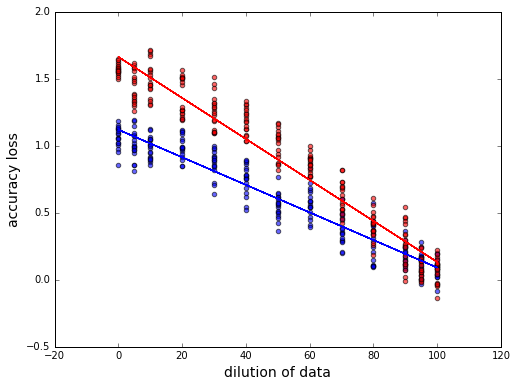

In [77]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(fan.ratio, fan.spearman, c ='b', alpha = 0.6)
plt.scatter(det.ratio, det.spearman, c = 'r', alpha = 0.6)
plt.xlabel('dilution of data', fontsize = 14)
plt.ylabel('accuracy loss', fontsize = 14)


z = np.polyfit(fan.ratio, fan.spearman, 1)
p = np.poly1d(z)
ax.plot(fan.ratio, p(fan.ratio), linestyle = (0, (5, 5)), c = 'b')

z = np.polyfit(det.ratio, det.spearman, 1)
p = np.poly1d(z)
ax.plot(det.ratio, p(det.ratio), linestyle = (0, (5, 5)), c = 'r')

plt.show()

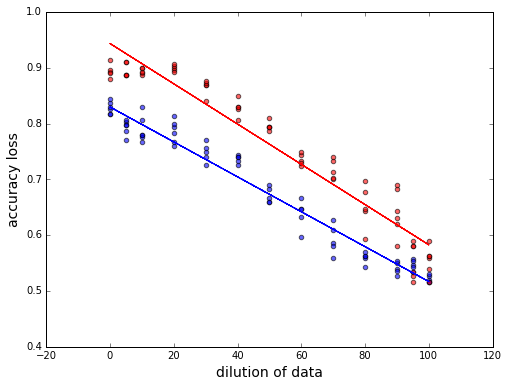

In [37]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(fan.ratio, fan.alien, c ='b', alpha = 0.6)
plt.scatter(det.ratio, det.alien, c = 'r', alpha = 0.6)
plt.xlabel('dilution of data', fontsize = 14)
plt.ylabel('accuracy loss', fontsize = 14)


z = np.polyfit(fan.ratio, fan.alien, 1)
p = np.poly1d(z)
ax.plot(fan.ratio, p(fan.ratio), linestyle = (0, (5, 5)), c = 'b')

z = np.polyfit(det.ratio, det.alien, 1)
p = np.poly1d(z)
ax.plot(det.ratio, p(det.ratio), linestyle = (0, (5, 5)), c = 'r')

plt.show()

In [7]:
det.head()

,testype,name1,name2,ratio,spearman,spear1on2,spear2on1,loss,loss1on2,loss2on1,acc1,acc2,alienacc1,alienacc2,meandate1,meandate2
1,detective2mixed,golddetective_0,mixeddata_0_0,100,0.080297,0.032722,0.127871,0.300000,0.266667,0.333333,0.906667,0.813333,0.573333,0.546667,1891.413333,1888.706667
3,detective2mixed,golddetective_0,mixeddata_0_5,95,0.244162,0.278577,0.209747,0.290000,0.213333,0.366667,0.906667,0.833333,0.540000,0.620000,1891.413333,1889.853333
5,detective2mixed,golddetective_0,mixeddata_0_10,90,0.460880,0.285993,0.635767,0.210000,0.246667,0.173333,0.906667,0.880000,0.733333,0.633333,1891.413333,1892.026667
7,detective2mixed,golddetective_0,mixeddata_0_20,80,0.556937,0.448766,0.665107,0.186667,0.206667,0.166667,0.906667,0.860000,0.740000,0.653333,1891.413333,1889.646667
9,detective2mixed,golddetective_0,mixeddata_0_30,70,0.684194,0.532530,0.835858,0.163333,0.193333,0.133333,0.906667,0.846667,0.773333,0.653333,1891.413333,1889.720000


In [43]:
lm = smf.ols(formula='ratio ~ loss', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ratio   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1591.
Date:                Mon, 01 Jan 2018   Prob (F-statistic):          7.87e-106
Time:                        09:34:40   Log-Likelihood:                -916.18
No. Observations:                 234   AIC:                             1836.
Df Residuals:                     232   BIC:                             1843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7569      1.346      5.022      0.000       4.106       9.408
loss         264.3615      6.628     39.886      0.000     251.303     277.420
==============================================================================
Omnibus:                        7.065   Durbin-Watson:                   2.585
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                5.800
Skew:                           0.294   Prob(JB):                       0.0550
Kurtosis:                       2.500   Cond. No.                         8.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""